# Linear regression using scikit-learn 


## Import Libraries

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Dataset
The dataset that is loaded below is a dataset which is designed to show that Scikit-Learn requires data to be free of missing values. If you don't remove or impute your missing values, you will get an error. The goal of this dataset is to use the feature column x to predict the target column y. 

In [22]:
# Load the dataset using relative path
df = pd.read_csv(R'..\data\linear.csv')

##  Remove Missing or Impute Values
If you want to build models with your data, null values are (almost) never allowed. It is important to always see how many samples have missing values and for which columns.

In [23]:
# Look at the shape of the dataframe
df.shape

(102, 2)

In [24]:
# There are missing values in the y column which is the target variable
df.isnull().sum()

x    0
y    8
dtype: int64

You can either remove rows where there is a missing value or you can fill in missing values. The option used in this notebook is to remove rows with missing values. 

In [25]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [26]:
# There are no more missing values
print(df.isnull().sum())
print(df.shape)

x    0
y    0
dtype: int64
(94, 2)


You could have filled in missing values using the `fillna` method on a pandas series if you want

## Arrange Data into Features Matrix and Target Vector

In [27]:
# Define features and target
X = df[['x']].values  # Ensures X is a 2D array
y = df['y'].values  # y is a 1D array

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

<b>Step 1:</b> Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

<b>Step 2:</b> Make an instance of the Model

This is a place where you can tune the hyperparameters of a model. In the case of linear regression, you can set `fit_intercept` to True or False depending on your needs. This is an important concept as more complex models have a lot more you can tune. 

In [29]:
# Make a linear regression instance
model = LinearRegression(fit_intercept=True)

In [30]:
# If you want to see what you can tune for a model, you can use the help function
# help(LinearRegression)

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x and y

In [31]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Print model parameters
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [1.57493054]
Intercept: -50.80973497811631


## Evaluating Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [34]:
# Evaluate the model using R-squared
r_squared = model.score(X_test, y_test)
print("R-squared value:", r_squared)

R-squared value: 0.9815723948508608


### Visualizing Model Performance

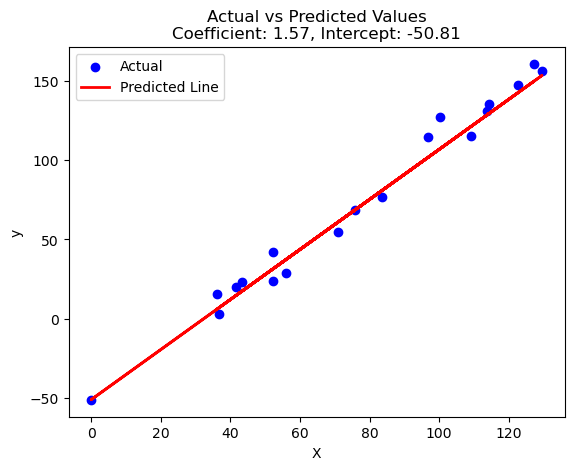

In [37]:
# Coefficient and intercept values
coefficient = model.coef_[0]
intercept = model.intercept_

# Make predictions on the test set
y_pred = model.predict(X_test)

# Plotting the actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Actual vs Predicted Values\nCoefficient: {coefficient:.2f}, Intercept: {intercept:.2f}')
plt.legend()
plt.show()